#### K. Petite "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# Summarization of business problem:

* While many movies succeed and make millions, there are a large sum of movies that do not succeed and end up losing money. This causes issues for production houses - if they don't make money they will effectively go bankrupt and stop producing films which is ultimately bad for the industry. 

* What if there was a way to figure out if a movie was going to be successful before it released to the public and before a ton of money was thrown at it? 

* That is what we are going to attempt to solve in the following file.

## Q1: What are the projects goals?

1. The primary and obvious goal of the project is to find the factors that are the largest contributors to the success of a film. 

2. If we can identify these factors then we will be able to understand what makes a movie great or not.

3. Another goal of the project is to understand what it takes to do true data analysis on a real data set and real business problem.

## Q2: If you’re hired as a data/business analyst to predict how well a movie will perform in theaters, what kind of data would you collect?

1. The overall budget of the movie
2. The marketing budget for the movie
3. The lead and supporting actors/actresses
4. The director
5. Genre
6. Whether the movie is a sequel/prequel or the start of a series
7. How much the movie earned
8. Where the movie was produced
9. The producer
10. Are the producers and actors independent of eachother (yes or no)

## Q3: What variables are highly correlated to imdb score?

1. The actors/actresses in the film
2. Quality of the reviews it has received
3. Budget

# Import Packages

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
import plotly.express as px

## Import File & Data Understanding

In [17]:
df=pd.read_csv("movie_metadata.csv_movie_metadata.csv")
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [19]:
df.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                133.000000              614.000000  5.340988e+06   
50%                371.500000              988.000000  2.551750e+07   
75%                636.000000            11000.000000  6.230944e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.043000e+03                5043.000000           5030.000000   
mean      8.366816e+04                9699.063851              1.371173   
std       1.384853e+05               18163.799124              2.013576   
min       5.000000e+00                   0.000000              0.000000   
25%       8.593500e+03                1411.000000              0.000000   
50%       3.435900e+04                3090.000000              1.000000   
75%       9.630900e+04               13756.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           5022.000000  4.551000e+03  4935.000000   
mean             272.770808  3.975262e+07  2002.470517   
std              377.982886  2.061149e+08    12.474599   
min                1.000000  2.180000e+02  1916.000000   
25%               65.000000  6.000000e+06  1999.000000   
50%              156.000000  2.000000e+07  2005.000000   
75%              326.000000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             5030.000000  5043.000000   4714.000000           5043.000000  
mean              1651.754473     6.442138      2.220403           7525.964505  
std               4042.438863     1.125116      1.385113          19320.445110  
min                  0.000000     1.600000      1.180000              0.000000  
25%                281.000000     5.800000      1.850000              0.000000  
50%                595.000000     6.600000      2.350000            166.000000  
75%                918.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

total count is 5043 so there are a few categories with missing info

There are several categories that are not numerical and therefore would be very difficult to analyze quantitatively. In which case it would be best to create dummy variables if the particular column in necessary for analysis. 

In [20]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Largest categories with missing values:
* Gross (can be replaced with avg)
* Budget (can be replaced with average)
* Content Rating
* Title_year
* Plot_keywords
* Director_facebook_likes
* Director_name   

In [21]:
df.director_name.value_counts().head()

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
Name: director_name, dtype: int64

In [22]:
df.budget.value_counts().head()

20000000.0    174
15000000.0    143
25000000.0    142
30000000.0    141
10000000.0    135
Name: budget, dtype: int64

In [23]:
df.gross.value_counts().head()

218051260.0    3
3000000.0      3
34964818.0     3
5773519.0      3
47000000.0     3
Name: gross, dtype: int64

In [24]:
df.cast_total_facebook_likes.value_counts().head()

0       33
5        7
2020     6
2        6
1044     5
Name: cast_total_facebook_likes, dtype: int64

In [25]:
df.genres.value_counts().head()

Drama                   236
Comedy                  209
Comedy|Drama            191
Comedy|Drama|Romance    187
Comedy|Romance          158
Name: genres, dtype: int64

# Data Preperation

In [26]:
df = df.drop(['color','country','aspect_ratio','movie_imdb_link',
              'plot_keywords','num_user_for_reviews','language','title_year'], axis=1)
df.head()
# Drop uneccesary columns

director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
4        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

      actor_1_name                                        movie_title  \
0      CCH Pounder                                            Avatar    
1      Johnny Depp          Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                           Spectre    
3        Tom Hardy                             The Dark Knight Rises    
4      Doug Walker  Star Wars: Episode VII - The Force Awakens    ...   

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
4                8                        143                   NaN   

   facenumber_in_poster content_rating       budget  actor_2_facebook_likes  \
0                   0.0          PG-13  237000000.0                   936.0   
1                   0.0          PG-13  300000000.0                  5000.0   
2                   1.0          PG-13  245000000.0                   393.0   
3                   0.0          PG-13  250000000.0                 23000.0   
4                   0.0            NaN          NaN                    12.0   

   imdb_score  movie_facebook_likes  
0         7.9                 33000  
1         7.1                     0  
2         6.8                 85000  
3         8.5                164000  
4         7.1                     0

In [27]:
# fill numerical nulls with averages

df = df.fillna({'gross' : round(df['gross'].mean(),0)})
df = df.fillna({'budget' : round(df['budget'].mean(),0)})
df = df.fillna({'num_critic_for_reviews' : round(df['num_critic_for_reviews'].mean(),0)})
df = df.fillna({'duration' : round(df['duration'].mean(),0)})
df = df.fillna({'director_facebook_likes' : round(df['director_facebook_likes'].mean(),0)})
df = df.fillna({'actor_3_facebook_likes' : round(df['actor_3_facebook_likes'].mean(),0)})
df = df.fillna({'actor_1_facebook_likes' : round(df['actor_1_facebook_likes'].mean(),0)})
df = df.fillna({'actor_2_facebook_likes' : round(df['actor_2_facebook_likes'].mean(),0)})
df = df.fillna({'facenumber_in_poster' : round(df['facenumber_in_poster'].mean(),0)})
df.head()

director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
4        Doug Walker                   140.0     107.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                   645.0        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0   48468408.0                      Documentary   

      actor_1_name                                        movie_title  \
0      CCH Pounder                                            Avatar    
1      Johnny Depp          Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                           Spectre    
3        Tom Hardy                             The Dark Knight Rises    
4      Doug Walker  Star Wars: Episode VII - The Force Awakens    ...   

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
4                8                        143                   NaN   

   facenumber_in_poster content_rating       budget  actor_2_facebook_likes  \
0                   0.0          PG-13  237000000.0                   936.0   
1                   0.0          PG-13  300000000.0                  5000.0   
2                   1.0          PG-13  245000000.0                   393.0   
3                   0.0          PG-13  250000000.0                 23000.0   
4                   0.0            NaN   39752620.0                    12.0   

   imdb_score  movie_facebook_likes  
0         7.9                 33000  
1         7.1                     0  
2         6.8                 85000  
3         8.5                164000  
4         7.1                     0

In [28]:
#check for nulls again
df.isnull().sum()

director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
content_rating               303
budget                         0
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [29]:
# Replace rows without Director/Actor name with "no name" rather than having null value
df = df.fillna({'director_name' : 'no name'})
df = df.fillna({'actor_1_name' : 'no name'})
df = df.fillna({'actor_2_name' : 'no name'})
df = df.fillna({'actor_3_name' : 'no name'})
df = df.fillna({'content_rating' : 'not rated'})
df.head()

director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
4        Doug Walker                   140.0     107.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                   645.0        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0   48468408.0                      Documentary   

      actor_1_name                                        movie_title  \
0      CCH Pounder                                            Avatar    
1      Johnny Depp          Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                           Spectre    
3        Tom Hardy                             The Dark Knight Rises    
4      Doug Walker  Star Wars: Episode VII - The Force Awakens    ...   

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
4                8                        143               no name   

   facenumber_in_poster content_rating       budget  actor_2_facebook_likes  \
0                   0.0          PG-13  237000000.0                   936.0   
1                   0.0          PG-13  300000000.0                  5000.0   
2                   1.0          PG-13  245000000.0                   393.0   
3                   0.0          PG-13  250000000.0                 23000.0   
4                   0.0      not rated   39752620.0                    12.0   

   imdb_score  movie_facebook_likes  
0         7.9                 33000  
1         7.1                     0  
2         6.8                 85000  
3         8.5                164000  
4         7.1                     0

In [30]:
# final check for null values
df.isnull().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
content_rating               0
budget                       0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [31]:
#new columns for easy understanding of profit and return
df['percent_return'] = round((df['gross']/df['budget'])*100,0)
df['profit'] = round(df['gross']-df['budget'],0)
df.head()

director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
4        Doug Walker                   140.0     107.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                   645.0        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0   48468408.0                      Documentary   

      actor_1_name  ... cast_total_facebook_likes          actor_3_name  \
0      CCH Pounder  ...                      4834             Wes Studi   
1      Johnny Depp  ...                     48350        Jack Davenport   
2  Christoph Waltz  ...                     11700      Stephanie Sigman   
3        Tom Hardy  ...                    106759  Joseph Gordon-Levitt   
4      Doug Walker  ...                       143               no name   

   facenumber_in_poster content_rating       budget actor_2_facebook_likes  \
0                   0.0          PG-13  237000000.0                  936.0   
1                   0.0          PG-13  300000000.0                 5000.0   
2                   1.0          PG-13  245000000.0                  393.0   
3                   0.0          PG-13  250000000.0                23000.0   
4                   0.0      not rated   39752620.0                   12.0   

   imdb_score  movie_facebook_likes  percent_return       profit  
0         7.9                 33000           321.0  523505847.0  
1         7.1                     0           103.0    9404152.0  
2         6.8                 85000            82.0  -44925825.0  
3         8.5                164000           179.0  198130642.0  
4         7.1                     0           122.0    8715788.0  

[5 rows x 22 columns]

# Business Intelligence

## What is the average imdb score?

In [32]:
df['imdb_score'].mean()

6.442137616498111

## What is the average profit for a movie?

In [33]:
df['profit'].mean()

8715787.215942891

~8,700,000

## Does gross have an impact on the success of a movie? In other words, do all great movies make big money or do some great movies only make little money?

In [34]:
px.scatter(df, y="imdb_score", x="gross",hover_data = ["movie_title"], trendline='ols')
#As Gross increase, so does imdb_score

## Do FB likes have any affect on imbd_score?

In [35]:
px.scatter(df, y="imdb_score", x="cast_total_facebook_likes",hover_data = ["movie_title"], trendline='ols')

## What directors have the highest average imdb score?

In [36]:
df.groupby('director_name')['imdb_score'].mean().sort_values(ascending = False).head()
#directors with the highest average imdb_scores

director_name
John Blanchard      9.5
Mitchell Altieri    8.7
Cary Bell           8.7
Sadyk Sher-Niyaz    8.7
Mike Mayhall        8.6
Name: imdb_score, dtype: float64

## Who are the most frequent directors?

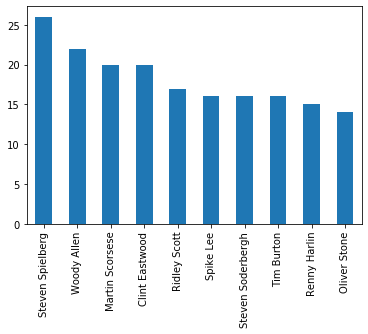

In [37]:
direct = df['director_name'].value_counts().iloc[1:].head(10)
direct.plot(kind = 'bar')
#most frequent directors

## What is the average imdb score of the most frequest directors?

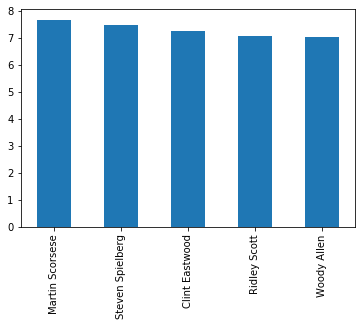

In [38]:
score = df.groupby('director_name')['imdb_score'].sum().sort_values(ascending = False).iloc[1:]
avg = score/direct
avg.sort_values(ascending = False).head().plot(kind = 'bar')

## Who are the most frequent lead actors or actor_1

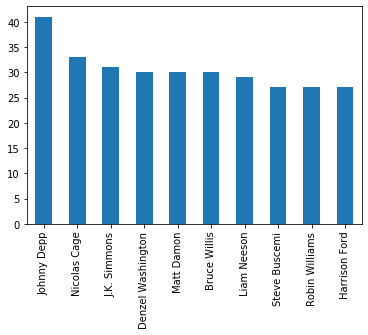

In [39]:
act = df['actor_1_name'].value_counts().iloc[1:].head(10)
act.plot(kind = 'bar')
#most frequent actors

## What actors have the highest average IMDB scores?

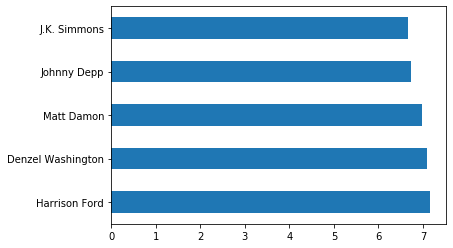

In [40]:
score2 = df.groupby('actor_1_name')['imdb_score'].sum().sort_values(ascending = False).iloc[1:]
avg2 = score2/act
avg2.sort_values(ascending = False).head().plot(kind = 'barh')

## Which lead actor or actress has the highest imdb average?

In [41]:
df.groupby('actor_1_name')['imdb_score'].mean().sort_values(ascending = False).head()

actor_1_name
Krystyna Janda     9.1
Jack Warden        8.9
Rob McElhenney     8.8
Abigail Evans      8.7
Takashi Shimura    8.7
Name: imdb_score, dtype: float64

## How does budget impact the imdb score of a movie?

In [42]:
px.scatter(df, y="imdb_score", x="budget",hover_data = ["movie_title"], color = 'content_rating', size = 'gross', trendline = 'ols')

In [43]:
round(df['budget'].mean(),0)

39752620.0

~40,000,000

## How does the number of reviews impact imdb score?

In [44]:
px.scatter(df, y="imdb_score", x="num_critic_for_reviews",hover_data = ["movie_title"], size = 'gross',trendline = 'ols')

# Correlation Analysis

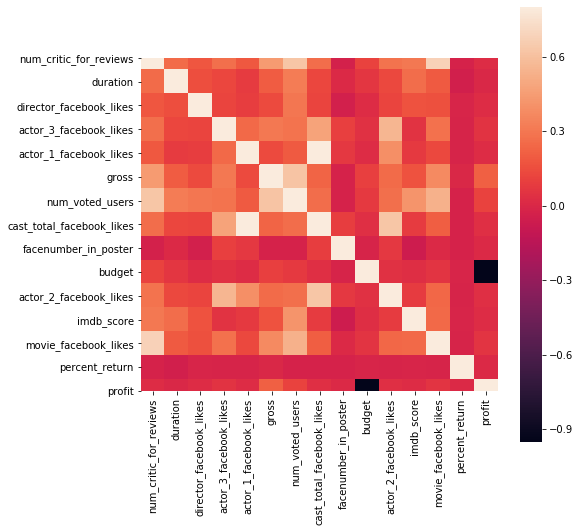

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),vmax=.8, square=True)

#### imdb_score is clearly affected strongly by a couple variables:
1. num_critic_for_reviews
2. num_voted_users
3. movie_facebook_likes

#### other notes
1. I thought it was interesting to note that the num_voted_users is highly correlated to the gross amount a movie makes
2. Percent return is pretty much unaffected by any variables, in other words how much return a movie has is completely independent of the given variables

# Final Notes & Summarization

## Gross vs. IMDB Score

1. As the gross amount increases so does the imdb_score. This would show that the larger a movie has budgeted the more it can expect to make. This makes sense if you think of Risk vs. Reward theory.
2. Movies with a higher gross recieve more attention, which can lead to more reviews and a better imdb score

## Reviews vs. IMDB Score

1. As num_critic_for_reviews increases so does imdb_score, the more positive reviews something gets the more inclined someone may be to review it which can lead to the increased attention. 


## Budget vs. IMDB Score

1. The Trendline found with budgets shows to be pretty horizontal and to have little to no correlation to imdb_score. 
2. In this case, regardless of how large or small your budget is, your movie can still get an amazing or terrible score. 
3. This can be seen when comparing Towering Inferno (low budget, high score) with Transformers: Age of Extinction (high budget, low score)
4. Or comparing, The Dark Knight Rises (high budget, high score) with The Last Gofather (low budget, low score)
5. There is little to no correlation 

## Actor/Actress vs. IMDB Score

1. The average IMDB score is 6.44 so when an actor/actress has a higher average IMDB score one can assume they bring up the IMDB score for the movies they are a part of. 
2. This would mean that the top 4 most frequently used Actors (Harrison Ford, Denzel Washington, Matt Damon, & Johnny Depp) help to increase the IMDB score of the movie
3. Good Acting = Higher score

## Director vs. IMDB Score

1. The average IMDB score is 6.44 so when a director has a higher average IMDB score one can assume they bring up the IMDB score for the movies they are a part of. 
2. This would mean that the top 5 most frequently used Directors (Martin Scorsese, Steven Spielberg, Clint Eastwood, Ridley Scott, & Woody Allen) help to increase the IMDB score of the movie
3. Good Directing = Higher score

## Facebook Likes vs. IMDB Score

1. As the number of facebook likes for both the movie and the actors invovled goes up so does the imdb_score
2. In a way likes on these pages can be seen as their own IMDB Score

# Conclusion

### Things for a great movie:
1. Great Actors/Actresses
2. A great director
3. Good marketing & ability to get the movie out to the public

# Final Project Extension 
- K. Petite "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

## Project Description
- Now that we have looked at the dataset from an analysis standpoint we will now look at it from a modeling standpoint

## Goals:
- Determine the best classification model in terms of metrics
- Determine which variables are the most important to predict a Movie's success
- Impart suggestions to predic the success of a movie

## Import Packages

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# Regression Analysis

In [47]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'content_rating', 'budget',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes',
       'percent_return', 'profit'],
      dtype='object')

In [48]:
#assigning columns to X and Y variables
y = df['imdb_score'] 
X = df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 
        'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
        'num_voted_users', 'cast_total_facebook_likes',
        'facenumber_in_poster', 'budget',
        'actor_2_facebook_likes','movie_facebook_likes',
        'percent_return', 'profit']]
#with so many X variables this may disrupt the accuracy of the model

In [49]:
y.head(2)

0    7.9
1    7.1
Name: imdb_score, dtype: float64

In [50]:
X.head(2)

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   
1                   302.0     169.0                    563.0   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                       4834                   0.0   
1           471220                      48350                   0.0   

        budget  actor_2_facebook_likes  movie_facebook_likes  percent_return  \
0  237000000.0                   936.0                 33000           321.0   
1  300000000.0                  5000.0                     0           103.0   

        profit  
0  523505847.0  
1    9404152.0

In [51]:
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)
model1_y

array([8.3721109 , 7.57818312, 7.46308145, ..., 6.42008766, 6.08203787,
       6.18933401])

In [52]:
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 7.10738505e-04  6.52177042e-03  1.42446127e-05  8.20529208e-05
  8.44085711e-05 -1.36280699e-09  3.19310148e-06 -8.38701028e-05
 -2.47528369e-02 -7.01344382e-10  8.47778399e-05  8.82475622e-07
  1.30977506e-07 -6.63191915e-10]
y-intercept  5.559807123157601


In [54]:
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_))))

0             1
0      num_critic_for_reviews  7.107385e-04
1                    duration  6.521770e-03
2     director_facebook_likes  1.424461e-05
3      actor_3_facebook_likes  8.205292e-05
4      actor_1_facebook_likes  8.440857e-05
5                       gross -1.362807e-09
6             num_voted_users  3.193101e-06
7   cast_total_facebook_likes -8.387010e-05
8        facenumber_in_poster -2.475284e-02
9                      budget -7.013444e-10
10     actor_2_facebook_likes  8.477784e-05
11       movie_facebook_likes  8.824756e-07
12             percent_return  1.309775e-07
13                     profit -6.631919e-10

In [55]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.001'),
 ('duration', '0.007'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.025'),
 ('budget', '-0.000'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '0.000'),
 ('percent_return', '0.000'),
 ('profit', '-0.000')]

In [56]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.9905459115990471
variance or r-squared:  0.21735243421747896


not very accurate..

#### Let's try this with less X variables, using the previously found relevant variables from above (let's use 5 variables)

In [57]:
y = df['imdb_score'] 
X = df[['num_critic_for_reviews','director_facebook_likes', 
        'actor_1_facebook_likes', 'budget', 'gross']]

In [58]:
model2 = lm.LinearRegression()
model2.fit(X, y)   
model2_y = model2.predict(X)
model2_y

array([8.27655202, 7.01162147, 7.64091459, ..., 6.09207831, 6.06377187,
       6.13750547])

In [59]:
coef = ["%.3f" % i for i in model2.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.002'),
 ('director_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('budget', '-0.000'),
 ('gross', '0.000')]

In [148]:
print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  1.1313813837067013
variance or r-squared:  0.10607587638185989


### this model is even less accurate than above. This means we either chose the wrong variables for the model or more variables are needed for accurate predicitons

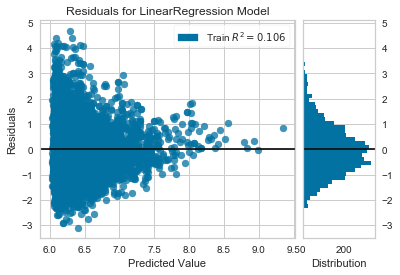

In [149]:
from yellowbrick.regressor import ResidualsPlot

regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X, y)  # Fit the training data to the model
visualizer.poof()                 # Draw/show/poof the data

#### these models don't do too great of a job of prediciting the values. This may be due to the large number of data points and inconsitences (where low budget movies perform well, or low level actors are in great movies)

## Lasso Regression

In [125]:
model3 = lm.Lasso(alpha=0.1)    
model3.fit(X, y)
model3_y = model3.predict(X)
model3_y

array([8.27640413, 7.01239518, 7.63800236, ..., 6.09310846, 6.06447765,
       6.13793446])

In [126]:
print('Coefficients: ', model3.coef_)
print("y-intercept ", model3.intercept_)

Coefficients:  [2.46726658e-03 4.62692017e-05 8.01119831e-07 5.74583465e-10
 6.20075204e-10]
y-intercept  6.030979999869169


In [127]:
coef = ["%.3f" % i for i in model3.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.002'),
 ('director_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('budget', '0.000'),
 ('profit', '0.000')]

In [128]:
print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))

mean square error:  1.131382260659286
variance or r-squared:  0.10607518348635858


#### similar accuracy as the previous linear regression model (not very good)

## Feature Selection

In [129]:
#reset x variables so the feature selection can choose the two most prominent 
X = df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 
        'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
        'num_voted_users', 'cast_total_facebook_likes',
        'facenumber_in_poster', 'budget',
        'actor_2_facebook_likes','movie_facebook_likes',
        'percent_return', 'profit']]

X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[7.23000e+02, 8.86204e+05],
       [3.02000e+02, 4.71220e+05],
       [6.02000e+02, 2.75868e+05],
       ...,
       [1.30000e+01, 3.80000e+01],
       [1.40000e+01, 1.25500e+03],
       [4.30000e+01, 4.28500e+03]])

In [130]:
selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[0 6]


f_regression determines that **'num_critic_for_reviews'** and **'num_voted_users'** are two most important predictors

In [131]:
model4 = lm.LinearRegression()
model4.fit(X_new, y)
model4_y = model4.predict(X_new)

print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  1.1313813837067013
variance or r-squared:  0.10607587638185989


#### We're still seeing a pretty low accuracy for these models. Reasoning for this can be seen above

# Classification Model

### Import packages

In [56]:
# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

### Binning IMDB_Scores

In [57]:
df['movie_quality'] = pd.cut(df['imdb_score'], 
                      bins=[0,4,6,8, float('Inf')], 
                      labels=['bad', 'ok', 'good','excellent'])

df[['movie_quality','imdb_score']].head() #check to make sure it bins correctly 

movie_quality  imdb_score
0          good         7.9
1          good         7.1
2          good         6.8
3     excellent         8.5
4          good         7.1

In [58]:
# drop the imdb_score column
df = df.drop('imdb_score', axis = 1)
df.head()

director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
4        Doug Walker                   140.0     107.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                   645.0        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0   48468408.0                      Documentary   

      actor_1_name  ... cast_total_facebook_likes          actor_3_name  \
0      CCH Pounder  ...                      4834             Wes Studi   
1      Johnny Depp  ...                     48350        Jack Davenport   
2  Christoph Waltz  ...                     11700      Stephanie Sigman   
3        Tom Hardy  ...                    106759  Joseph Gordon-Levitt   
4      Doug Walker  ...                       143               no name   

   facenumber_in_poster content_rating       budget actor_2_facebook_likes  \
0                   0.0          PG-13  237000000.0                  936.0   
1                   0.0          PG-13  300000000.0                 5000.0   
2                   1.0          PG-13  245000000.0                  393.0   
3                   0.0          PG-13  250000000.0                23000.0   
4                   0.0      not rated   39752620.0                   12.0   

   movie_facebook_likes  percent_return       profit  movie_quality  
0                 33000           321.0  523505847.0           good  
1                     0           103.0    9404152.0           good  
2                 85000            82.0  -44925825.0           good  
3                164000           179.0  198130642.0      excellent  
4                     0           122.0    8715788.0           good  

[5 rows x 22 columns]

### Decision Tree

In [59]:
#reassign x and y values
y = df['movie_quality'] 
X = df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 
        'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
        'num_voted_users', 'cast_total_facebook_likes',
        'facenumber_in_poster', 'budget',
        'actor_2_facebook_likes','movie_facebook_likes',
        'percent_return', 'profit']]

In [60]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier()

# Train a decision tree model
dt = dt.fit(X_train, y_train)

In [61]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")

0.628552544613351
--------------------------------------------------------
[[  5   0  22  26]
 [  0  39  41   7]
 [ 26  29 699 189]
 [ 25   2 195 208]]
--------------------------------------------------------
              precision    recall  f1-score   support

         bad       0.09      0.09      0.09        53
   excellent       0.56      0.45      0.50        87
        good       0.73      0.74      0.74       943
          ok       0.48      0.48      0.48       430

    accuracy                           0.63      1513
   macro avg       0.47      0.44      0.45      1513
weighted avg       0.63      0.63      0.63      1513

--------------------------------------------------------


much better accuracy in prediction here - with a 62.8% accurate model

### Knn

In [62]:
#assign training and test portions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

knn = KNeighborsClassifier()

knn = knn.fit(X_train, y_train)

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")

0.5703899537343027
--------------------------------------------------------
[[  4   1  39   9]
 [  0   3  76   8]
 [ 18  10 757 158]
 [  7   2 322  99]]
--------------------------------------------------------
              precision    recall  f1-score   support

         bad       0.14      0.08      0.10        53
   excellent       0.19      0.03      0.06        87
        good       0.63      0.80      0.71       943
          ok       0.36      0.23      0.28       430

    accuracy                           0.57      1513
   macro avg       0.33      0.29      0.29      1513
weighted avg       0.51      0.57      0.53      1513

--------------------------------------------------------


knn classifier is not as accurate as the decision tree - only 57% accurate

### Logisitic Regression

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500, multi_class = 'ovr')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))

0.6153337739590218
[[  0   0  54   0]
 [  0  31  54   0]
 [  0  43 900   0]
 [  0   2 429   0]]
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        54
   excellent       0.41      0.36      0.39        85
        good       0.63      0.95      0.76       943
          ok       0.00      0.00      0.00       431

    accuracy                           0.62      1513
   macro avg       0.26      0.33      0.29      1513
weighted avg       0.41      0.62      0.49      1513



/Users/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



61.5% - Logistic regression is more accurate than the knn model but still not as accurate as the decision tree

### SelectKBest (F-Selection in Classification)

In [66]:
#reassign values to remove negative variables
X = df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 
        'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
        'num_voted_users', 'cast_total_facebook_likes',
        'facenumber_in_poster', 'budget',
        'actor_2_facebook_likes','movie_facebook_likes',]]

In [67]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print(X_new)

[[7.60505847e+08 8.86204000e+05 2.37000000e+08]
 [3.09404152e+08 4.71220000e+05 3.00000000e+08]
 [2.00074175e+08 2.75868000e+05 2.45000000e+08]
 ...
 [4.84684080e+07 3.80000000e+01 1.40000000e+03]
 [1.04430000e+04 1.25500000e+03 3.97526200e+07]
 [8.52220000e+04 4.28500000e+03 1.10000000e+03]]


In [68]:
selector = SelectKBest(chi2, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[5 6 9]


In [69]:
X.head(1)
#gross, num_votes_users, budget

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                       4834                   0.0   

        budget  actor_2_facebook_likes  movie_facebook_likes  
0  237000000.0                   936.0                 33000

In [70]:
X = X_new

In [71]:
# Build a decision tree model with those three features ... Split validation:train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Initialize decisiontreeclassifier()
dt2 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train the model
dt2 = dt2.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, dt2.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt2.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt2.predict(X_test)))
print("--------------------------------------------------------")

0.6378056840713814
--------------------------------------------------------
[[  0   0  35  18]
 [  0  27  59   1]
 [  0   5 801 137]
 [  0   0 293 137]]
--------------------------------------------------------
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        53
   excellent       0.84      0.31      0.45        87
        good       0.67      0.85      0.75       943
          ok       0.47      0.32      0.38       430

    accuracy                           0.64      1513
   macro avg       0.50      0.37      0.40      1513
weighted avg       0.60      0.64      0.60      1513

--------------------------------------------------------


/Users/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



using f-selection we get a slightly more accurate decision tree model - 63.7%

### Feature Importance

In [72]:
#reassign x values
X = df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 
        'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
        'num_voted_users', 'cast_total_facebook_likes',
        'facenumber_in_poster', 'budget',
        'actor_2_facebook_likes','movie_facebook_likes',]]

In [73]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print(model_extra.score(X, y))

# display the relative importance of each attribute
print((model_extra.feature_importances_))

/Users/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



1.0
[0.09024843 0.10521783 0.07463699 0.07625939 0.06669599 0.08411861
 0.13961227 0.07140775 0.05528955 0.08763807 0.07261321 0.07626189]


In [74]:
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in model_extra.feature_importances_], X.columns)))

Features sorted by their rank:
[(0.0553, 'facenumber_in_poster'), (0.0667, 'actor_1_facebook_likes'), (0.0714, 'cast_total_facebook_likes'), (0.0726, 'actor_2_facebook_likes'), (0.0746, 'director_facebook_likes'), (0.0763, 'actor_3_facebook_likes'), (0.0763, 'movie_facebook_likes'), (0.0841, 'gross'), (0.0876, 'budget'), (0.0902, 'num_critic_for_reviews'), (0.1052, 'duration'), (0.1396, 'num_voted_users')]


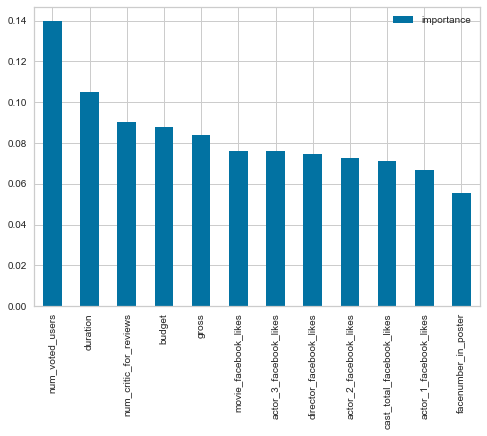

In [75]:
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
            columns=['importance']).sort_values('importance', ascending=False).plot(kind = 'bar')

#### According to feature selection, the most important variables are:
- num_voted_users
- duration
- budget
- num_critic_for_reviews
- gross

# K-Means Clustering

### Import Packages

In [132]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

### Variance Analysis

In [133]:
#add imdb_score back into the X values for clustering
X = df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 
        'actor_3_facebook_likes', 'imdb_score', 'actor_1_facebook_likes', 'gross',
        'num_voted_users', 'cast_total_facebook_likes',
        'facenumber_in_poster', 'budget',
        'actor_2_facebook_likes','movie_facebook_likes',]]

In [134]:
X.var()

num_critic_for_reviews       1.464033e+04
duration                     6.330223e+02
director_facebook_likes      7.751561e+06
actor_3_facebook_likes       2.759717e+06
imdb_score                   1.265886e+00
actor_1_facebook_likes       2.253100e+08
gross                        3.864261e+15
num_voted_users              1.917817e+10
cast_total_facebook_likes    3.299236e+08
facenumber_in_poster         4.044388e+00
budget                       3.833781e+16
actor_2_facebook_likes       1.629918e+07
movie_facebook_likes         3.732796e+08
dtype: float64

In [135]:
# we need to normalize this data so we can get all the data points on a similar unit
X.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   
1                   302.0     169.0                    563.0   
2                   602.0     148.0                      0.0   
3                   813.0     164.0                  22000.0   
4                   140.0     107.0                    131.0   

   actor_3_facebook_likes  imdb_score  actor_1_facebook_likes        gross  \
0                   855.0         7.9                  1000.0  760505847.0   
1                  1000.0         7.1                 40000.0  309404152.0   
2                   161.0         6.8                 11000.0  200074175.0   
3                 23000.0         8.5                 27000.0  448130642.0   
4                   645.0         7.1                   131.0   48468408.0   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                       4834                   0.0   
1           471220                      48350                   0.0   
2           275868                      11700                   1.0   
3          1144337                     106759                   0.0   
4                8                        143                   0.0   

        budget  actor_2_facebook_likes  movie_facebook_likes  
0  237000000.0                   936.0                 33000  
1  300000000.0                  5000.0                     0  
2  245000000.0                   393.0                 85000  
3  250000000.0                 23000.0                164000  
4   39752620.0                    12.0                     0

In [136]:
# normalize data
X1 = (X - X.mean()) / (X.max() - X.min())
X1.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                0.717743  0.140475                -0.029849   
1                0.199271  0.122618                -0.005370   
2                0.568729  0.080951                -0.029849   
3                0.828581  0.112697                 0.926673   
4               -0.000237 -0.000398                -0.024153   

   actor_3_facebook_likes  imdb_score  actor_1_facebook_likes         gross  \
0            9.130012e-03    0.184540               -0.008688  9.362684e-01   
1            1.543436e-02    0.083274                0.052250  3.431082e-01   
2           -2.104390e-02    0.045299                0.006937  1.993486e-01   
3            9.719561e-01    0.260489                0.031937  5.255217e-01   
4           -4.224539e-07    0.083274               -0.010045  5.131374e-10   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0         0.474941                  -0.007408             -0.031865   
1         0.229353                   0.058854             -0.031865   
2         0.113744                   0.003047             -0.008610   
3         0.627704                   0.147793             -0.031865   
4        -0.049510                  -0.014551             -0.031865   

         budget  actor_2_facebook_likes  movie_facebook_likes  
0  1.614730e-02               -0.005224              0.072992  
1  2.130469e-02                0.024440             -0.021564  
2  1.680221e-02               -0.009188              0.221989  
3  1.721152e-02                0.155827              0.448350  
4 -3.223881e-11               -0.011969             -0.021564

In [137]:
#after normalization all values are on a similar unit
X1.var() 

num_critic_for_reviews       0.022204
duration                     0.002492
director_facebook_likes      0.014653
actor_3_facebook_likes       0.005217
imdb_score                   0.020283
actor_1_facebook_likes       0.000550
gross                        0.006681
num_voted_users              0.006717
cast_total_facebook_likes    0.000765
facenumber_in_poster         0.002187
budget                       0.000257
actor_2_facebook_likes       0.000868
movie_facebook_likes         0.003065
dtype: float64

In [138]:
#five clusters
k_means = KMeans(init='k-means++', n_clusters=5, random_state=0)
k_means.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [139]:
#results
k_means.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [140]:
k_means.cluster_centers_

array([[-0.08213829, -0.01919212, -0.02598841, -0.00767904, -0.18537867,
        -0.00370049, -0.02034956, -0.03727981, -0.00504394,  0.00511235,
        -0.00107793, -0.00548228, -0.01824666],
       [-0.08262475, -0.00133305, -0.02284393, -0.0125058 ,  0.06069179,
        -0.00330895, -0.0233024 , -0.02995592, -0.00508164, -0.00174522,
        -0.00107016, -0.00496404, -0.01724307],
       [ 0.33410429,  0.03819172, -0.01656866,  0.06915735,  0.11707953,
         0.01082279,  0.1587736 ,  0.17375806,  0.01980122,  0.00336637,
         0.00437876,  0.02491712,  0.11881104],
       [ 0.11300918,  0.03447244,  0.60791256,  0.03497796,  0.10306531,
         0.01002279,  0.05103215,  0.10326815,  0.01481124, -0.00886665,
         0.00079668,  0.01470276,  0.03499041],
       [ 0.11008357,  0.00636853, -0.02051354,  0.00432263,  0.04389481,
         0.00471154,  0.00822814,  0.02446206,  0.00582618, -0.00198372,
         0.00152266,  0.00473249,  0.00935789]])

In [141]:
df_new = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df_new.head()

cluster
0        2
1        2
2        2
3        3
4        1

In [142]:
df = df.reset_index(drop=True)
df_new = df_new.reset_index(drop=True)

df_new2 = df.join(df_new)
df_new2.head()

director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
4        Doug Walker                   140.0     107.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                   645.0        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0   48468408.0                      Documentary   

      actor_1_name  ...          actor_3_name  facenumber_in_poster  \
0      CCH Pounder  ...             Wes Studi                   0.0   
1      Johnny Depp  ...        Jack Davenport                   0.0   
2  Christoph Waltz  ...      Stephanie Sigman                   1.0   
3        Tom Hardy  ...  Joseph Gordon-Levitt                   0.0   
4      Doug Walker  ...               no name                   0.0   

   content_rating       budget  actor_2_facebook_likes imdb_score  \
0           PG-13  237000000.0                   936.0        7.9   
1           PG-13  300000000.0                  5000.0        7.1   
2           PG-13  245000000.0                   393.0        6.8   
3           PG-13  250000000.0                 23000.0        8.5   
4       not rated   39752620.0                    12.0        7.1   

   movie_facebook_likes  percent_return       profit  cluster  
0                 33000           321.0  523505847.0        2  
1                     0           103.0    9404152.0        2  
2                 85000            82.0  -44925825.0        2  
3                164000           179.0  198130642.0        3  
4                     0           122.0    8715788.0        1  

[5 rows x 23 columns]

### Interpretation of Clustering

In [143]:
df_new2.groupby(['cluster']).size()

cluster
0    1266
1    2011
2     334
3     181
4    1251
dtype: int64

In [144]:
df_new2.groupby('cluster').mean()

num_critic_for_reviews    duration  director_facebook_likes  \
cluster                                                                
0                     73.496051   97.527646                88.785940   
1                     73.179015  106.538041               160.991546   
2                    411.485030  126.449102               305.440120   
3                    231.955801  124.574586             14668.508287   
4                    229.705036  110.401279               214.982414   

         actor_3_facebook_likes  actor_1_facebook_likes         gross  \
cluster                                                                 
0                    468.391785             4191.733807  3.299245e+07   
1                    357.860269             4451.824465  3.074239e+07   
2                   2235.628743            13486.631737  1.692166e+08   
3                   1449.502762            12974.629834  8.727864e+07   
4                    744.270983             9568.361311  5.477139e+07   

         num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
cluster                                                                     
0           20674.266193                6386.560032              1.590047   
1           33106.942317                6378.598210              1.294878   
2          377277.407186               22703.116766              1.514970   
3          258166.447514               19426.049724              0.988950   
4          125058.410871               13509.733813              1.285372   

               budget  actor_2_facebook_likes  imdb_score  \
cluster                                                     
0        2.658522e+07              900.682464    4.977646   
1        2.667996e+07              977.161114    6.921880   
2        9.324132e+07             5065.401198    7.367066   
3        4.948446e+07             3666.033149    7.256354   
4        5.840359e+07             2293.421263    6.788249   

         movie_facebook_likes  percent_return        profit  
cluster                                                      
0                 1157.881517     2778.300948  6.407234e+06  
1                 1513.098956     4680.068125  4.062429e+06  
2                48991.017964      309.110778  7.597531e+07  
3                19737.618785      429.149171  3.779418e+07  
4                10798.729017     1288.540368 -3.632207e+06

### Profile Explanation 

1. **Worst performing movies** - Low imdb_score, low budget, low gross, low publicity (director/actor facebook likes). Middle of pack on budget
2. **Second worst performing movies** - low gross, budget, and publicity. Difference is they have a much higher avg. imdb_score
3. **Best performing movies** - high avg imdb_score, profit, budget, gross, & publicity. 
4. **Second best performing movies** - have a high imdb_score, budget, gross, & publicity but all slightly lower than the movies placed in the 3rd bucket
5. **Middle of the pack** - only bin to have movies with negative profit, but have highish imdb_score, & publicity

### Profiles ranked Best to worst:
1. Profile 3 (best movies)
2. Profile 4
3. Profile 5
4. Profile 2
5. Profile 1 (worst movies)

# Analysis & Storytelling 

## Analysis:
 
### **Key findings from regression**
   - Our regression models were our worst performing models clocking in at around 20% accurate. 
   - Because imdb_scores are not binned and there are a large amount of y variables, the models have a tough time predicting values
   - A way to improve this would be to 1. limit the number of variables (which was tested, and had limited effects) or 2. increase the percent error with which would be acceptable for accurate predictions.
   - This would mean making a predicition score of 5.2 be accurate for a residual of 5.1 or 5.3 (+-.1% error)

### **Key findings from classification**
   - By binning the imdb_scores into 4 categories, it allows our models a wider range of error (rather than picking from infinite numbers between 0 & 10, the model is chosing between 4 options). 
   - The decision tree model was the fairly effective at ~62% accurate
   - logistic regression came in much less affective at ~57% accurate
   - By using the F-Selection we get our most affective model with ~63% accuracy
   - The F-Selection model also gave light to our most important variables (gross, num_voted_users, budget)

### **Key findings from clustering**
   - Clustering gave way to 5 different profiles with the following distribution of movies:
       - Cluster 1: 1266
       - Cluster 2: 2011
       - Cluster 3: 334
       - Cluster 4: 181
       - Cluster 5: 1251

   - The profiles for each Cluster can be found above under the "Profile Explanation" tab
   - Based off the profiles, the following variables seemed to stand out as most signficant
       - imdb_score, budget, gross, publicity (facebook likes), & profit

### **Your “best” classification model in terms of metrics**
   - The best classification model was a combination a decision tree coupled with the use of F-Selection
   - This is largely due to the use of the most significant y variables paired with the previously most accurate model (decision tree)
   - **Decision Tree coupled with F-Selection**

## Story telling: 

### **What variables are considered important to predict imdb_score and movie success?**
- The most significant variables are:
    - Budget
    - Gross
    - Num_Voted_Users
    - Num_Critic_For_Review
    - Publicity (facebook likes for actor, director, and movie page)

### **What recommendations do you have for movie producers / investors / viewers? What additional variables would you need to improve the model prediction?**
Recommendations for **Movie Producers**:
- When producing a movie you want to look for the following criteria before supporting
    1. How much monetary support is there for the movie? (budget)
    2. Who are the actors & actresses invovled - how well known are they? (facebook likes & popularity)
    3. Who is directing the movie - how well known are they? (facebook likes & popularity)

Recommendations for **Investors**:
- As an investor, you are chosing to put money into the movie with very limited knowledge so there are only a few things you can consider
    1. Who are the actors & actresses involved - how well known are they? (facebook likes & popularity)
    2. Who is directing the movie - how well known are they? (facebook likes & popularity)
    3. Is there already support for the movie? Is the budget inflated with other monies? (budget)

Recommendations for **Viewers**:
- As a viewer, you have the ability to wait for the movie to debut before chosing to see it which allows more exclusive selection for your viewing 
    1. Who are the actors & actresses involved - how well known are they? (facebook likes & popularity)
    2. Who is directing the movie - how well known are they? (facebook likes & popularity)
    3. How big was the budget for the movie? (budget)
    4. What was the gross revenue from the movie's opening week? (gross)
    5. Does there seem to be a big marketing budget? Have you seen lots of ads for the movie? (publicity & budget)

### How we can improve our models:
- Add in a specific variable for the marketing budget this could be used to narrow down on publicity
- Add in the production house (who is backing the movie) would be advantageous as we could then find trends between companies to see where there is more or less success
- Add in the investors involved in the movie
- A variable for the movies opening weekend gross revenue & profit
- A variable for the number of total viewers ($ amount can be misleading as ticket prices change)